In [4]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft
from scipy.io.wavfile import write

(0.0, 1.0)

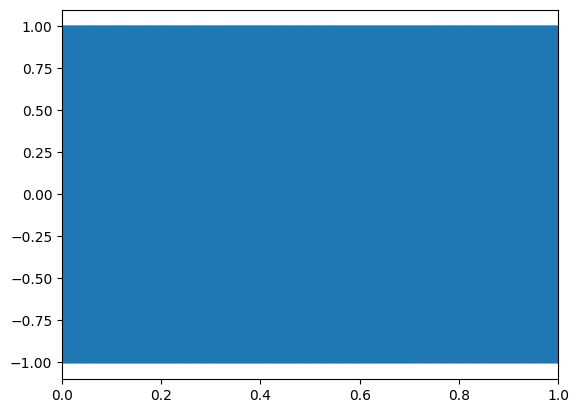

In [25]:
SAMP_FREQ = 44100

def cria_Som(freq_musical, tempo):
    t = np.linspace(0, tempo, int(tempo*SAMP_FREQ))
    wave = np.sin(2 * np.pi * freq_musical * t)
    return t, wave

t, y = cria_Som(525, 10)

plt.plot(t,y)
plt.xlim(0,1)

In [26]:
audio = (y/y.max()) * 32767
audio1 = np.int16(audio)
audio2 = np.int16(-audio)
write('test.wav', SAMP_FREQ, audio1)
write('anti-test.wav', SAMP_FREQ, audio2)

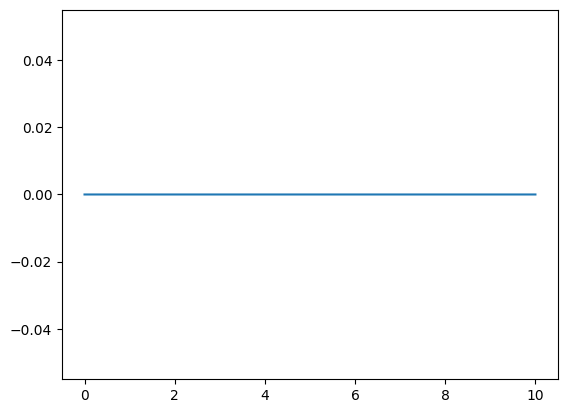

In [27]:
plt.plot(x, audio1+audio2)